In [8]:
import geopandas as gpd
import pandas as pd
import numpy as np
import random
import sys, os.path, os
from tqdm import tqdm
import pickle as pkl
from shapely.geometry import Point,Polygon
import dateutil.parser

import random
from datetime import datetime, timedelta

import sys, os.path, os
try:
    from google.colab import drive
    drive.mount('/content/drive')

    path_opencp="drive/Shareddrives/FAIRNESS/Colab/Librerias/PredictCode/"
    path_fairness="drive/Shareddrives/FAIRNESS/Colab/Librerias/"
    path_exp="drive/Shareddrives/FAIRNESS/Colab/Notebooks_for_topic/EXP0/SCRIPTS/"
    
except:
    path_opencp="/Users/diegohernandez/Google Drive/Unidades compartidas/FAIRNESS/Colab/Librerias/PredictCode/"
    path_fairness="/Users/diegohernandez/Google Drive/Unidades compartidas/FAIRNESS/Colab/Librerias/"
    path_exp="/Users/diegohernandez/Google Drive/Unidades compartidas/FAIRNESS/Colab/Notebooks_for_topic/EXP0/SCRIPTS/"


sys.path.insert(0, os.path.abspath(path_opencp))
sys.path.insert(0, os.path.abspath(path_fairness))
sys.path.insert(0, os.path.abspath(path_exp))

import open_cp
import open_cp.geometry
import matplotlib.pyplot as plt

try:
    os.chdir("drive/Shareddrives/FAIRNESS/Colab/Notebooks_for_topic/EXP0/DATOS/BOGOTA")
except:
    os.chdir("/Users/diegohernandez/Google Drive/Unidades compartidas/FAIRNESS/Colab/Notebooks_for_topic/EXP0/DATOS/BOGOTA")


## <center> <font color='red'>1. Seleccionando las localidades

In [9]:
localidades=gpd.read_file('localidades.json')
localidades
localidades=localidades.query("LocCodigo not in ('01','11','19','05','20')")
localidades.to_file('localidades_filtrada.geojson', driver="GeoJSON")

In [10]:
localidades

,LocNombre,LocAAdmini,LocArea,LocCodigo,SHAPE_Leng,SHAPE_Area,geometry
0,ANTONIO NARIÑO,Acuerdo 117 de 2003,4.879543e+06,15,0.108973,0.000397,"MULTIPOLYGON (((-74.13075 4.59335, -74.12917 4..."
1,TUNJUELITO,Acuerdo 117 de 2003,9.910940e+06,06,0.210542,0.000807,"MULTIPOLYGON (((-74.13777 4.59489, -74.13165 4..."
2,RAFAEL URIBE URIBE,Acuerdo 117 de 2003,1.383408e+07,18,0.174513,0.001126,"MULTIPOLYGON (((-74.12803 4.59254, -74.12777 4..."
3,CANDELARIA,Acuerdo 117 de 2003,2.060243e+06,17,0.067158,0.000168,"MULTIPOLYGON (((-74.06621 4.60317, -74.06620 4..."
4,BARRIOS UNIDOS,Acuerdo 8 de 1977,1.190345e+07,12,0.121180,0.000969,"MULTIPOLYGON (((-74.05725 4.68684, -74.06249 4..."
5,TEUSAQUILLO,Acuerdo 8 de 1977,1.419317e+07,13,0.148314,0.001156,"MULTIPOLYGON (((-74.09372 4.66607, -74.09332 4..."
6,PUENTE ARANDA,Acuerdo 8 de 1977,1.731115e+07,16,0.161116,0.001410,"MULTIPOLYGON (((-74.11830 4.63741, -74.11504 4..."
7,LOS MARTIRES,Acuerdo 8 de 1977,6.514046e+06,14,0.099382,0.000530,"MULTIPOLYGON (((-74.07283 4.61542, -74.07311 4..."
10,CHAPINERO,Acuerdo 8 de 1977 y Res 1751 de 2016,3.800891e+07,02,0.333966,0.003095,"MULTIPOLYGON (((-74.01116 4.66459, -74.01154 4..."
11,SANTA FE,Acuerdo 117 de 2003,4.517065e+07,03,0.395052,0.003678,"MULTIPOLYGON (((-73.99446 4.61425, -73.99457 4..."


## <center> <font color='red'>2. Cargando la data y generando eventos

In [11]:
data_bogota=pd.read_csv('data_nueva_grilla_BOGOTA_200_.csv')
data_bogota.query("cantidad_crimenes!=0.0",inplace=True)
data_bogota.reset_index(drop=True,inplace=True)

In [ ]:
data_bogota.head()

,fecha_crimen,FESTIVO,DIA_SEMANA,LONGITUD_X,LATITUD_Y,cantidad_crimenes
0,2018-01-01,1.0,1.0,-74.185581,4.64586,1.0
1,2018-01-01,1.0,1.0,-74.183581,4.60186,1.0
2,2018-01-01,1.0,1.0,-74.183581,4.60786,1.0
3,2018-01-01,1.0,1.0,-74.173581,4.56586,1.0
4,2018-01-01,1.0,1.0,-74.169581,4.62786,1.0


In [ ]:
degrees_const=0.001/111.319
def creation_date(date,x,y,events):
  x_begin=x+degrees_const
  x_end=x-degrees_const
  y_begin=y+degrees_const
  y_end=y-degrees_const
  x_new=[random.uniform(x_begin, x_end) for _ in range(0,events)]
  y_neq=[random.uniform(y_begin, y_end) for _ in range(0,events)]

  fecha = datetime.strptime(date, "%Y-%m-%d")
  dates=[  (fecha+timedelta(hours=random.randint(0, 23), minutes=random.randint(0, 59), seconds=random.randint(0, 59))).strftime("%Y-%m-%d %H:%M:%S") for _ in range(0,events)]
  new_events=pd.DataFrame({'fecha_crimen':dates,'LONGITUD_X':x_new,'LATITUD_Y':y_neq})
  return new_events

In [ ]:
data_final=pd.DataFrame()
for i in tqdm(range(len(data_bogota))):
  result_=creation_date(data_bogota.iloc[i,0],data_bogota.iloc[i,3],data_bogota.iloc[i,4],int(data_bogota.iloc[i,5]))
  data_final=pd.concat([data_final,result_])

100%|██████████| 100107/100107 [04:43<00:00, 352.66it/s]


In [ ]:
data_final.to_csv('data_random_BOGOTA_200.csv')
data_final.head()

,fecha_crimen,LONGITUD_X,LATITUD_Y
0,2018-01-01 08:15:13,-74.185580,4.645860
0,2018-01-01 13:05:06,-74.183573,4.601855
0,2018-01-01 19:38:42,-74.183581,4.607868
0,2018-01-01 23:18:27,-74.173575,4.565858
0,2018-01-01 06:54:27,-74.169576,4.627852


## <center> <font color='red'>3. Generando datos bogota en formato opencp

In [ ]:
#pkl.load(open(path_file, "rb"))
data_bogota=pd.read_csv('data_random_BOGOTA_200.csv')
localidades=gpd.read_file('localidades_filtrada.geojson')

geometrias=gpd.GeoSeries([i for i in localidades.geometry])
geo=geometrias.unary_union

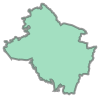

In [ ]:
geo

In [ ]:
points= gpd.GeoSeries([Point(data_bogota.iloc[i,2] ,data_bogota.iloc[i,3] ) for i in range(len(data_bogota))])
data_bogota_filterd=data_bogota[points.within(geo)]
data_bogota_filterd.head()

,Unnamed: 0,fecha_crimen,LONGITUD_X,LATITUD_Y
0,0,2018-01-01 08:15:13,-74.185580,4.645860
1,0,2018-01-01 13:05:06,-74.183573,4.601855
2,0,2018-01-01 19:38:42,-74.183581,4.607868
4,0,2018-01-01 06:54:27,-74.169576,4.627852
5,0,2018-01-01 12:46:51,-74.167588,4.613868


In [ ]:
geometria=[ Point(data_bogota_filterd.iloc[i,2],data_bogota_filterd.iloc[i,3]) for i in range(len(data_bogota_filterd))]
geo_pandas_bog=gpd.GeoDataFrame(data=data_bogota_filterd,geometry=geometria)
geo_pandas_bog.crs = 'EPSG:4326'
geo_pandas_bog_planas = geo_pandas_bog.to_crs(epsg=3116)

In [ ]:
geo_pandas_bog_planas['coord_x']=geo_pandas_bog_planas.geometry.apply(lambda x: x.x)
geo_pandas_bog_planas['coord_y']=geo_pandas_bog_planas.geometry.apply(lambda x: x.y)
geo_pandas_bog_planas.head()

,Unnamed: 0,fecha_crimen,LONGITUD_X,LATITUD_Y,geometry,coord_x,coord_y
0,0,2018-01-01 08:15:13,-74.185580,4.645860,POINT (988008.759 1005492.298),988008.759213,1.005492e+06
1,0,2018-01-01 13:05:06,-74.183573,4.601855,POINT (988230.714 1000626.115),988230.714435,1.000626e+06
2,0,2018-01-01 19:38:42,-74.183581,4.607868,POINT (988229.916 1001291.131),988229.916028,1.001291e+06
4,0,2018-01-01 06:54:27,-74.169576,4.627852,POINT (989784.250 1003500.693),989784.250226,1.003501e+06
5,0,2018-01-01 12:46:51,-74.167588,4.613868,POINT (990004.575 1001954.346),990004.575121,1.001954e+06


In [ ]:
timestamps = geo_pandas_bog_planas.fecha_crimen.map(dateutil.parser.parse)
xcoords, ycoords = (geo_pandas_bog_planas.coord_x.values, geo_pandas_bog_planas.coord_y.values)
#Uniendo coordenadas y formato de tiempo creado asociado a cada crimen
crime_point_bog_opencp = open_cp.TimedPoints.from_coords(timestamps, xcoords, ycoords)

In [ ]:
localidades.crs = 'EPSG:4326'
localidades_planas = localidades.to_crs(epsg=3116)
geometrias=gpd.GeoSeries([i for i in localidades_planas.geometry])
geo=geometrias.unary_union

In [ ]:
pkl.dump(crime_point_bog_opencp, open('data_random_BOGOTA_200_opencp.pkl', "wb"))
pkl.dump(geo, open('geo_bogota.pkl', "wb"))
pkl.dump(localidades_planas, open('localidades_filtrada_planas.pkl', "wb"))
localidades_planas.to_file('localidades_filtrada_planas.geojson',driver='GeoJSON')
geo_pandas_bog_planas.to_file('data_random_BOGOTA_200_localidades.geojson',driver='GeoJSON')

In [ ]:
geo_pandas_bog_planas.shape

(78806, 7)

## <center> <font color='red'>4. Generando region rectangular y cuadricula de prediccion.

In [ ]:
#data_bogota=pd.read_csv('data_random_BOGOTA_200_localidades.csv')
localidades=gpd.read_file('localidades_filtrada_planas.geojson')
geometrias=gpd.GeoSeries([i for i in localidades.geometry])
geo=geometrias.unary_union

#Generando Grilla para los algoritmos.

#maxx = max(data_bogota.LONGITUD_X)
#minx = min(data_bogota.LONGITUD_X)
#maxy = max(data_bogota.LATITUD_Y)
#miny = min(data_bogota.LATITUD_Y)
minx=geo.bounds[0]
miny=geo.bounds[1]
maxx=geo.bounds[2]
maxy=geo.bounds[3]

x_range=abs(maxx-minx)
y_range=abs(maxy-miny)
range_max=max(x_range,y_range)

region = open_cp.RectangularRegion(xmin=minx, xmax=minx+25*1000, ymin=miny, ymax=miny+25*1000)
# region = open_cp.RectangularRegion(xmin=0, xmax=1, ymin=0, ymax=1)

#Ventana espacial 1000x1000
grid = open_cp.data.Grid(xsize=1000, ysize=1000, xoffset=minx, yoffset=miny)
grid2 = open_cp.geometry.mask_grid_by_intersection(geo, grid)

In [ ]:
# crime_point_bog_opencp = pkl.load(open("data_random_BOGOTA_200_opencp.pkl", "rb")) ## cargar datos

# def convert(x,minx,maxx):
#     return (x-minx)/(maxx-minx)

# new_x=[convert(i,minx,minx+range_max) for i in crime_point_bog_opencp.xcoords]
# new_y=[convert(i,miny,miny+range_max) for i in crime_point_bog_opencp.ycoords]

# crime_point_bog_opencp=open_cp.TimedPoints.from_coords(crime_point_bog_opencp.timestamps, new_x, new_y)
# pkl.dump(crime_point_bog_opencp, open('data_random_BOGOTA_200_opencp.pkl', "wb"))

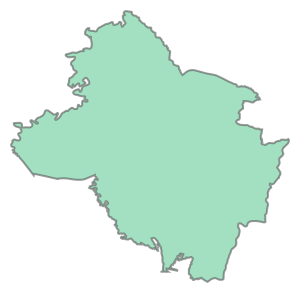

In [ ]:
geo

In [ ]:
geo.bounds

(983791.7606360756, 990282.2316803448, 1010094.3256417089, 1015914.8883224407)

In [ ]:
bounding=gpd.GeoDataFrame({'geometry':[Polygon([(geo.bounds[0], geo.bounds[1])
                        , (geo.bounds[0], geo.bounds[3])
                        , (geo.bounds[2], geo.bounds[3])
                        , (geo.bounds[2], geo.bounds[1])])]})
bounding.crs = "EPSG:4326"
bounding.to_file('bounding_box.geojson',driver='GeoJSON')
bounding

,geometry
0,"POLYGON ((983791.76064 990282.23168, 983791.76..."


In [ ]:
pkl.dump(region, open('definition_region.pkl', "wb"))
pkl.dump(grid2, open('grilla1_region.pkl', "wb"))
pkl.dump(grid, open('grilla2_region.pkl', "wb"))

## <center> <font color='red'>5. Generando mascara numpy de areas protegidas y no protegidas

In [ ]:
grid1=pkl.load(open('grilla1_region.pkl', "rb"))
grid2=pkl.load(open('grilla2_region.pkl', "rb"))
region=pkl.load(open('definition_region.pkl', "rb"))
geo=pkl.load(open('geo_bogota.pkl', "rb"))
localidades=gpd.read_file('localidades_filtrada_planas.geojson')

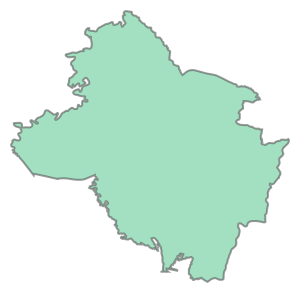

In [ ]:
geo

In [ ]:
# Coordenadas geográficas
inferior = (geo.bounds[0], geo.bounds[1])
superior = (geo.bounds[0]+25*1000, geo.bounds[1]+25*1000)

# Define la longitud y el ancho del cuadrado
#longitud = 0.002/111.319 # 200 metros en grados aproximadamente
#ancho = 0.002/111.319 # 200 metros en grados aproximadamente
#longitud = 1/111.319 # 200 metros en grados aproximadamente
#ancho = 1/111.319 # 200 metros en grados aproximadamente
longitud=1000
ancho=1000

mask = np.empty([ int((superior[1] - inferior[1]) / ancho) , int((superior[0] - inferior[0]) / longitud)])
mask.shape

(25, 25)

In [ ]:
countx=0
for x in tqdm(range(int((superior[0] - inferior[0]) / longitud))):
  county=0
  for y in range(int((superior[1] - inferior[1]) / ancho)):
    # Calcula las coordenadas de los vértices del cuadrado
    xmin = inferior[0] + x * longitud
    xmax = xmin + longitud
    ymin = inferior[1] + y * ancho
    ymax = ymin + ancho

    # Crea el polígono del cuadrado y agrega al GeoDataFrame
    square = Polygon([(xmin, ymin), (xmin, ymax), (xmax, ymax), (xmax, ymin)])
    try:
      mask[countx][county]=localidades[square.intersects(localidades.geometry)].reset_index(drop=True)["LocCodigo"][0]
    except:
      continue
    county+=1

  countx+=1

100%|██████████| 25/25 [00:03<00:00,  7.70it/s]


In [ ]:
mask=mask.astype(int)
mask.shape

(25, 25)

In [ ]:
pkl.dump(mask, open('mascara_localidades.pkl', "wb"))

In [ ]:
Protegidos=[3,4,6,7,10,14,15,17,18]
NoProtegidos=[2,8,9,11,12,13,16]

In [ ]:
mask_protegidos=np.isin(mask,Protegidos)
mask_noprotegidos=np.isin(mask,NoProtegidos)
mask_zeros=np.isin(mask,[0])

pkl.dump(mask_protegidos, open('mascara_protegidos.pkl', "wb"))
pkl.dump(mask_noprotegidos, open('mascara_noprotegidos.pkl', "wb"))
pkl.dump(mask_zeros, open('mascara_zeros.pkl', "wb"))

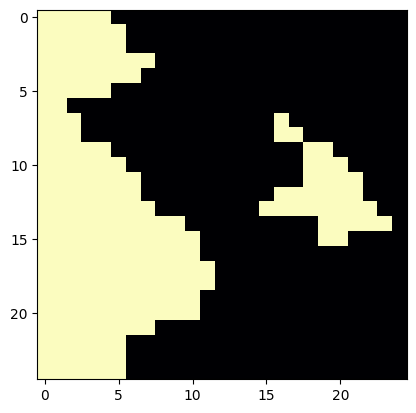

In [ ]:
plt.imshow( mask_protegidos , cmap = 'magma')

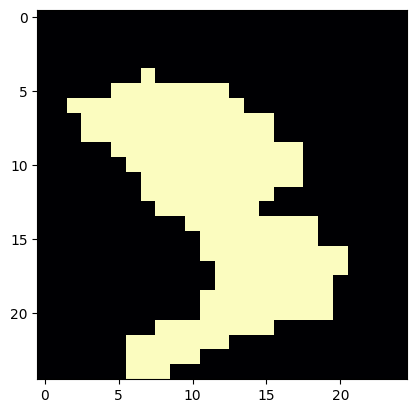

In [ ]:
plt.imshow( mask_noprotegidos , cmap = 'magma')

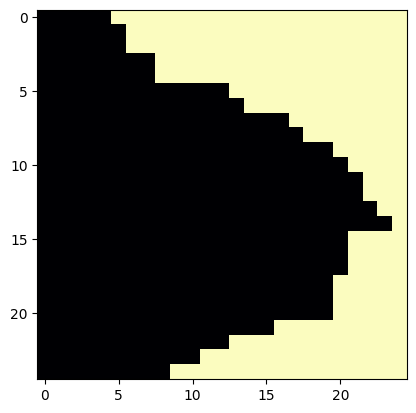

In [ ]:
plt.imshow( mask_zeros , cmap = 'magma')

## <center> <font color='red'>6. Split data

In [ ]:
import matplotlib.pyplot as plt
def plot_events(data,f_inicial,f_final):
    #Data ¡no manipulada!
    fig, ax = plt.subplots(ncols=2, figsize=(9,2.5))

    ax[0].scatter(data.xcoords, data.ycoords, marker="+", alpha=0.5)
    ax[0].set_title("Coordinates")
    ax[0].set_xlabel('Coordinate X')
    ax[0].set_ylabel('Coordinate Y')
    # ax[0].set(xlim=[0,1], ylim=[0,1])

    times = data.times_datetime()
    ax[1].scatter(times, data.ycoords, marker="+", alpha=0.1)
    ax[1].set_xlim([f_inicial, f_final])
    # ax[1].set_ylim([0, 1])
    ax[1].set_title("Coordinate Vs Dates")
    ax[1].set_xlabel('Date')
    ax[1].set_ylabel('Coordinate Y')
    fig.autofmt_xdate()
    None

In [ ]:
crime_point_bog_opencp = pkl.load(open("data_random_BOGOTA_200_opencp.pkl", "rb")) ## cargar datos
crime_point_bog_opencp=crime_point_bog_opencp[(crime_point_bog_opencp.times_datetime()<np.datetime64("2020-01-01 00:00:00"))]
len(crime_point_bog_opencp.xcoords)

49432

In [ ]:
mask_times=(crime_point_bog_opencp.times_datetime()<np.datetime64("2019-01-01 00:00:00"))
Train_bog=crime_point_bog_opencp[mask_times]
print(len(Train_bog.xcoords))

pkl.dump(Train_bog, open("Train_bog.pkl", "wb"))

Test_bog=crime_point_bog_opencp[~mask_times]
print(len(Test_bog.xcoords))
pkl.dump(Test_bog, open("Test_bog.pkl", "wb"))

23847
25585


In [ ]:
25585+23847

49432

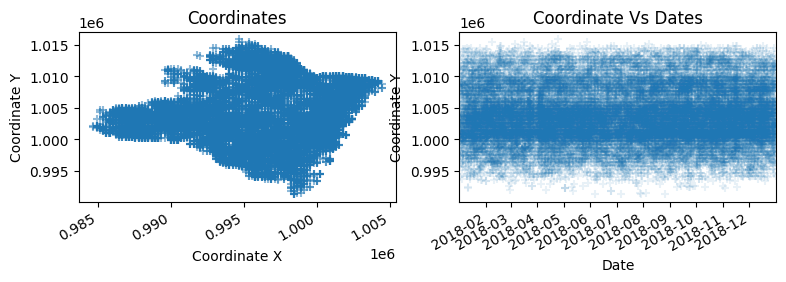

In [ ]:
plot_events(Train_bog,*Train_bog.time_range)

## <center> <font color='red'>7. Train and predict Models

In [ ]:
Train_bog = pkl.load(open("Train_bog.pkl", "rb")) ## cargar datos
Test_bog = pkl.load(open("Test_bog.pkl", "rb")) ## cargar datos
region = pkl.load(open("definition_region.pkl", "rb")) ## cargar datos

In [ ]:
len(Train_bog.xcoords),len(Test_bog.xcoords),len(Train_bog.xcoords)+len(Test_bog.xcoords)

(14397, 25585, 39982)

In [ ]:
from models.model_selection import NAIVE_MODEL, KDE_MODEL, SEPP_MODEL
from open_cp.sources.sepp import make_time_unit
from global_vars import days_time_unit
import datetime
from datetime import timedelta

def intensity_m(model,date,region,grid_size):

    try:
        predict=model.predict(date)
    except:
        predict=model.predict()

    try:
        M=open_cp.predictors.GridPredictionArray.from_continuous_prediction_region(predict, region, grid_size, grid_size)
        intensity_matrix= M.intensity_matrix
    except:
        intensity_matrix = predict.intensity_matrix

    if intensity_matrix.sum()==0:
        return intensity_matrix

    else:
        return intensity_matrix/intensity_matrix.sum()

### datos reales
import open_cp.naive as naive
def get_real_m(timedpoints,p_date,grid_size,region):
    real = timedpoints[(timedpoints.times_datetime()>=p_date) & ((timedpoints.times_datetime()<p_date+timedelta(days=1)))]
    predictor = naive.CountingGridKernel(grid_size,grid_size,region=region)
    predictor.data = real
    try:
        gridpred = predictor.predict().renormalise()
        real=gridpred.intensity_matrix.data

        return real
    except:
        return predictor.predict().intensity_matrix

Failed to load 'descartes' package.


In [ ]:
###### NAIVE
models_by_day={}
for day in range(7):
    path_file=os.path.join("NAIVE/model"+str(day)+".pkl")

    if not os.path.exists(path_file):
        train_filter=Train_bog[[i[0].astype(datetime.datetime).weekday()==day for i in Train_bog]]
        models_by_day[day]=NAIVE_MODEL(train_filter)
        pkl.dump(models_by_day[day], open(path_file, "wb"))

    else:

        models_by_day[day]=pkl.load(open(path_file, "rb"))

In [ ]:
A=intensity_m(models_by_day[0],np.datetime64("2019-10-01 00:00:00").astype(datetime.datetime),region,1000)

In [ ]:
A.shape

(25, 25)

In [ ]:
B=get_real_m(Test_bog,np.datetime64("2019-10-01 00:00:00").astype(datetime.datetime),1000,region)

In [ ]:
B.shape

(25, 25)

In [ ]:
A

In [ ]:
B

In [ ]:
###### KDE
import open_cp.kde as kde
models_by_day={}
for day in range(7):
    path_file=os.path.join("KDE/model"+str(day)+".pkl")

    if not os.path.exists(path_file):
        train_filter=Train_bog[[i[0].astype(datetime.datetime).weekday()==day for i in Train_bog]]
        models_by_day[day]=KDE_MODEL(train_filter,region,1000,kde.ExponentialTimeKernel(7))
        pkl.dump(models_by_day[day], open(path_file, "wb"))

    else:

        models_by_day[day]=pkl.load(open(path_file, "rb"))

In [ ]:
A=intensity_m(models_by_day[0],np.datetime64("2019-10-01 00:00:00").astype(datetime.datetime),region,1000)

In [ ]:
A.shape

(5, 5)

In [ ]:
B=get_real_m(Test_bog,np.datetime64("2019-10-01 00:00:00").astype(datetime.datetime),region.width/5,region)

In [ ]:
B.shape

(5, 5)

In [ ]:
Train_bog=Train_bog[(Train_bog.times_datetime()>np.datetime64("2018-06-01 00:00:00"))]

In [ ]:
### SEPP
path_file=os.path.join("SEPP/model.pkl")

if not os.path.exists(path_file):
    sepp_model_result=SEPP_MODEL(Train_bog,20,24*30*3,1000)
    pkl.dump(sepp_model_result, open(path_file, "wb"))

else:
    sepp_model_result=pkl.load(open(path_file, "rb"))

Inicia iteracion # 0
Iteracion:  0 Errores:  812.064486831098
Inicia iteracion # 1
Iteracion:  1 Errores:  1021.9835556423401
Inicia iteracion # 2
Iteracion:  2 Errores:  1845.2065450830353
Inicia iteracion # 3
Iteracion:  3 Errores:  2885.088874770962
Inicia iteracion # 4
Iteracion:  4 Errores:  3793.9941337555742
Inicia iteracion # 5
Iteracion:  5 Errores:  3424.2521051744857
Inicia iteracion # 6
Iteracion:  6 Errores:  1578.162529271301
Inicia iteracion # 7
Iteracion:  7 Errores:  248.2942909616398
Inicia iteracion # 8
Iteracion:  8 Errores:  99.09400367965353
Inicia iteracion # 9
Iteracion:  9 Errores:  40.64748276428914
Converge en  9 con cambio en p:  40.64748276428914


In [ ]:
if not os.path.exists(os.path.join("SEPP/","predictions6.pkl")):
    predictions={}
else:
    predictions=pkl.load(open(os.path.join("SEPP/","predictions6.pkl"), "rb"))

if not os.path.exists(os.path.join("SEPP/","reals.pkl")):
    reals={}
else:
    reals=pkl.load(open(os.path.join("SEPP/","reals.pkl"), "rb"))


for i in tqdm(range(30)):
    pred_date=Test_bog.time_range[0].astype(datetime.datetime)+timedelta(days=i)
    if not pred_date in predictions:
        predict=intensity_m(sepp_model_result,pred_date,region,1000)
        predictions[pred_date]=predict

    # real data
    if not pred_date in reals:
        real=get_real_m(Test_bog,pred_date,1000,region)
        reals[pred_date]=real
    # try:
    #     EMD[pred_date]=EMD(real,predict,25000000)
    # except:
    #     pass


    pkl.dump(predictions, open(os.path.join("SEPP/","predictions6.pkl"), "wb"))
    pkl.dump(reals, open(os.path.join("SEPP/","reals.pkl"), "wb"))

  0%|          | 0/30 [00:00<?, ?it/s]

  3%|▎         | 1/30 [45:07:35<1308:40:00, 162455.17s/it]

# <center> <font color='red'>7. Falta:

> ***1.*** Dividir data train y test, quitando 2020 (pandemia): Ultimo 3 meses para test. **Easy -Cristian**


> ***2.*** Entrenar modelos Naive, KDE y SEPP. Ejecutar codigos ya creados. **Easy - Cristian**


> ***3.*** crear mascara varaibles protegidas, no protegidas y null. **mediano -  Diego**


> ***4.*** Ejecuar codigos de fairness y EMD con los 3 meses de test. **Easy - Cristian**

In [1]:
for i in range(23,282):
  print(i)

23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
